In [1]:
import numpy as np
import scipy as sp
from markov_models import *
%pylab inline
import pandas as pd
from pandas_datareader import data
import datetime

Populating the interactive namespace from numpy and matplotlib


# Hidden Markov Model -- SP500 prediction

In [2]:
style.use("seaborn-poster")

In [3]:
symbol = 'SPX'
data_source='morningstar'
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2018,5,23)

df = data.DataReader(symbol, data_source, start_date, end_date)

In [4]:
df = df.dropna()
df.index = pd.MultiIndex.droplevel(df.index)

In [5]:
r_ = np.log(df.Close/df.Close[0])

In [6]:
t_train = 300
l_ = np.array([0]*t_train + [1]*(r_.size-t_train))
r_train = r_[:t_train]
r_test = r_[t_train:]

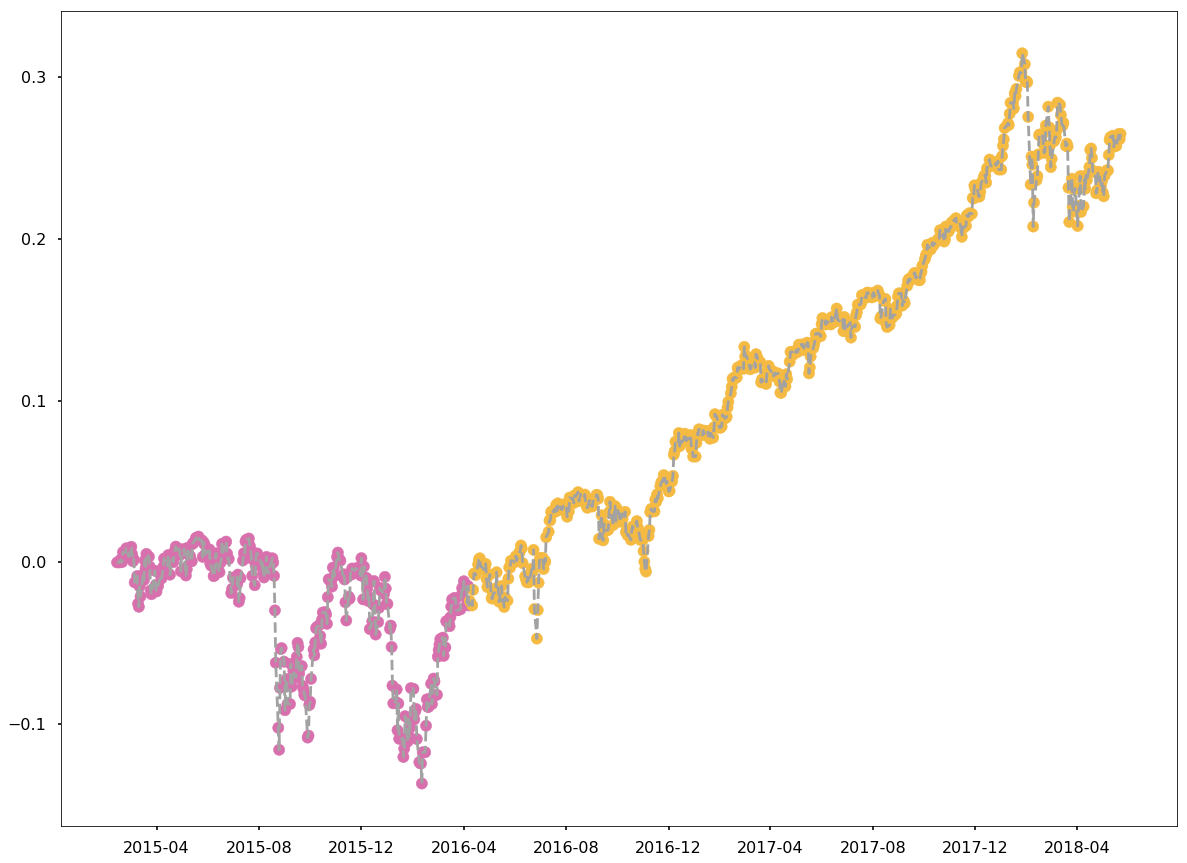

In [7]:
figure(figsize=(20,15))
plot(r_, '--', c=cc_[-1])
scatter(r_.index, r_, c=cc_[l_*9])

In [8]:
n_hidden = 5
p_i = np.random.uniform(size=n_hidden); p_i /=p_i.sum()
a_i = np.random.uniform(size=(n_hidden,n_hidden)); a_i /= a_i.sum(axis=1)[:,None]
print(a_i.sum(axis=1), p_i.sum())
param = {"initial": p_i, "transition": a_i, "emission": {'type': 'normal', 'mean': np.linspace(-1,1,n_hidden), 'variance': [1]*n_hidden}}
hmm = HiddenMarkovModel(param)

[1. 1. 1. 1. 1.] 1.0


In [9]:
hmm.fit(r_train)

EM converged within 94 steps


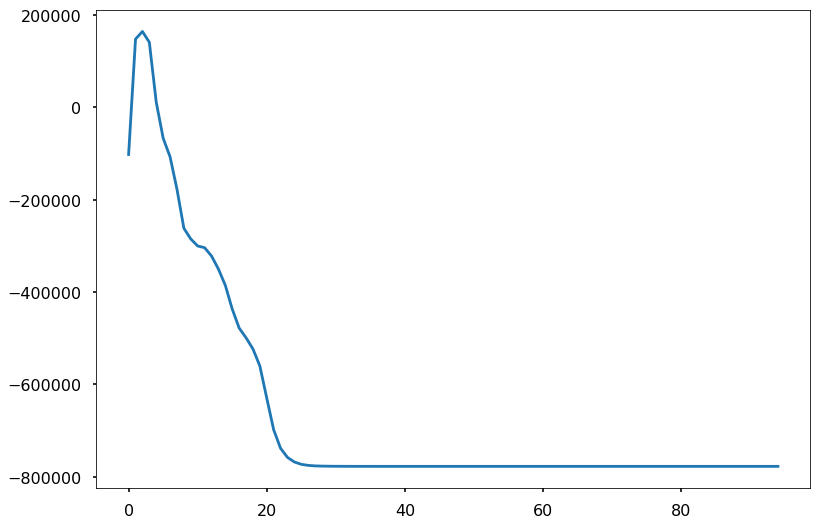

In [10]:
plot(hmm._Q_)

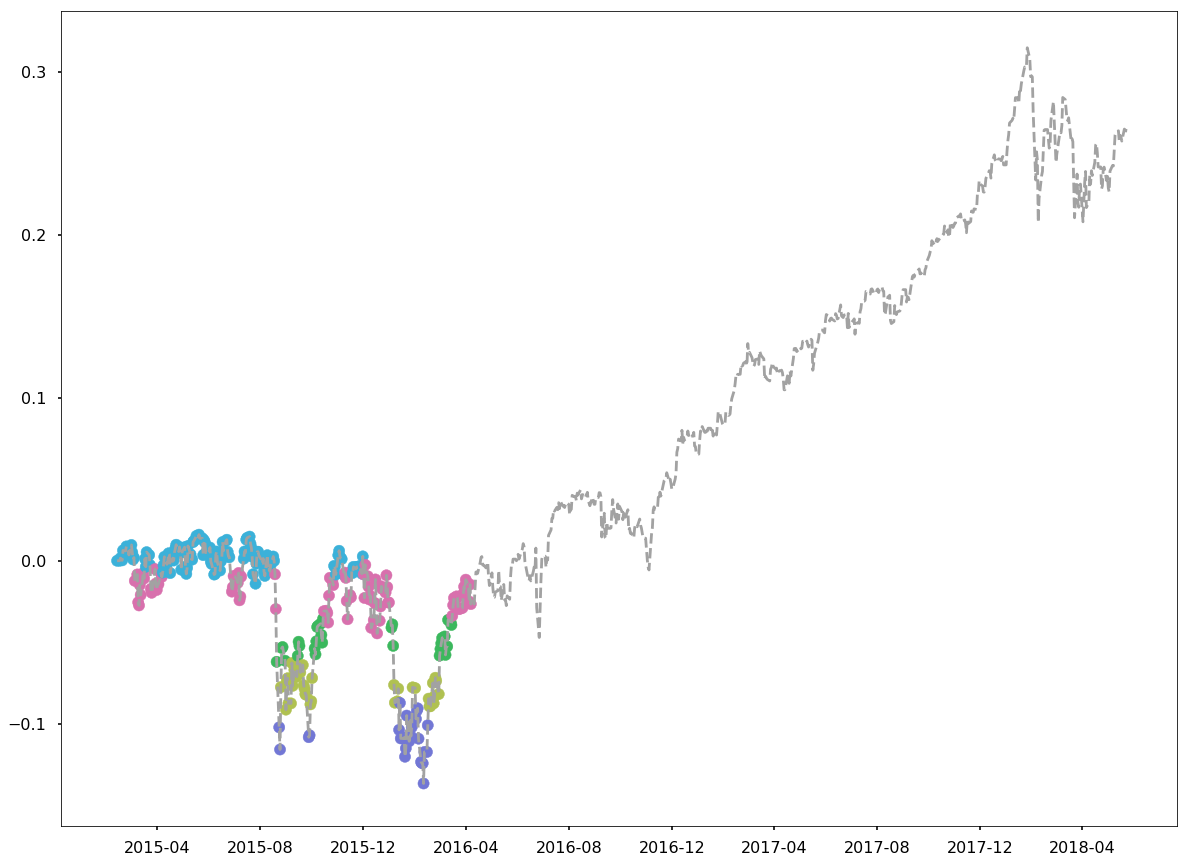

In [11]:
z_ = []
for p1 in hmm.posterior1:
    z_.append(np.argmax(p1))
z_ = np.array(z_)
figure(figsize=(20,15))
plot(r_, '--', c=cc_[-1])
scatter(r_.index[:t_train], r_train, c=cc_[z_*2])

In [12]:
def predict_plot(days, hmm_obj, r_test=None):
    x,y = hmm_obj.get_forcast_probability(days, n_sig=6)
    x *= 100
    fill_between(x[x<=0], 0, y[x<=0], color=cc_[-3])
    fill_between(x[x>0], 0, y[x>0], color=cc_[5])
    
    mean = hmm_obj.predict_observation(days, "mean")
    mode = hmm_obj.predict_observation(days, "mode")
    if r_test is not None:
        axvline(r_test[days]*100, ls = '-', color=cc_[-1], label="actual")
    axvline(mean*100, ls = '--', color='w', label="forcast: mean")
    axvline(mode*100, ls = ':', color=cc_[-1], label="forcast: mode")
    xlim(-50,50)
    ylim(0, y.max()*1.25)
    xlabel("log return %")
    legend(loc=0)

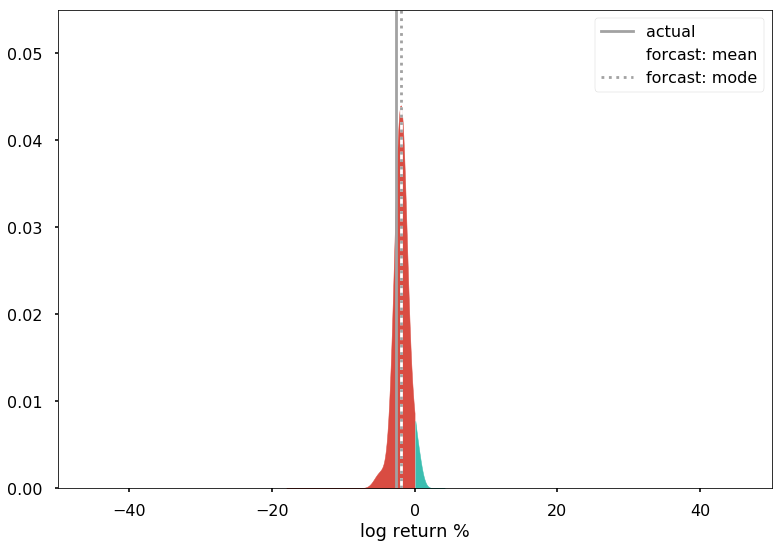

In [13]:
predict_plot(1, hmm, r_test)

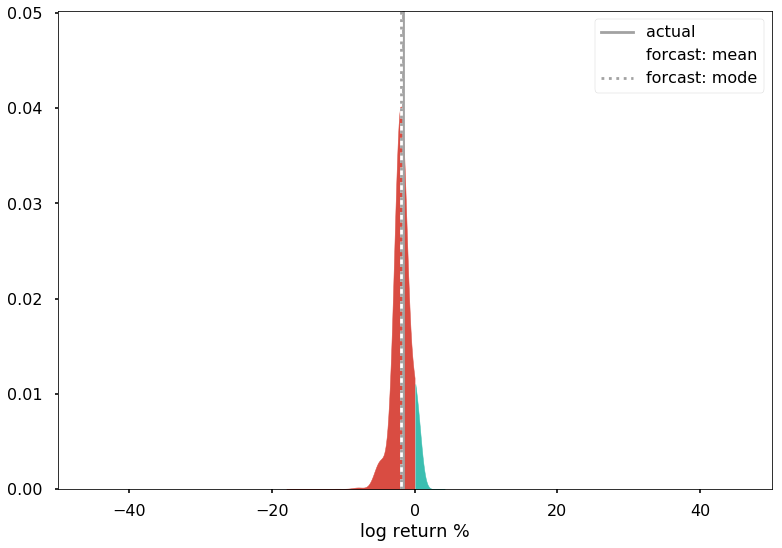

In [14]:
predict_plot(2, hmm, r_test)

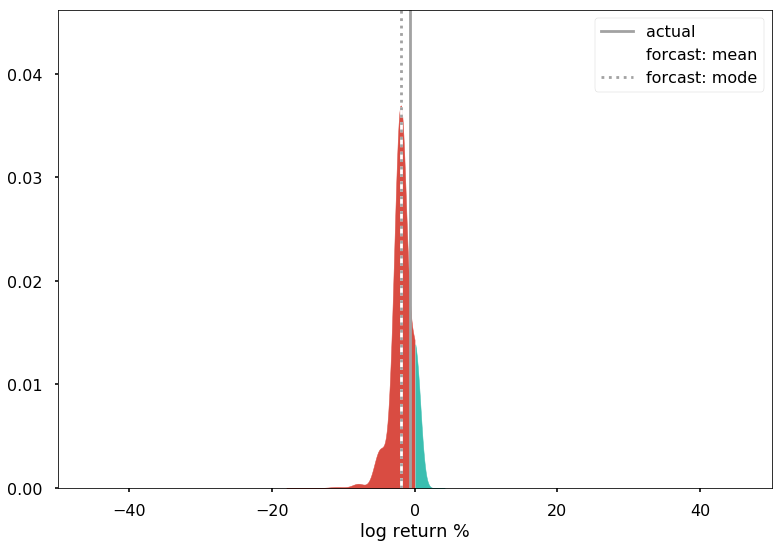

In [15]:
predict_plot(3, hmm, r_test)

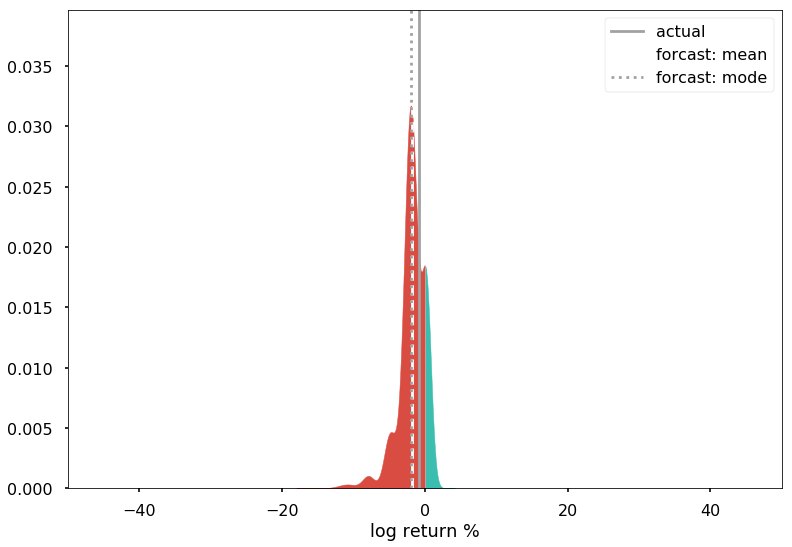

In [16]:
predict_plot(5, hmm, r_test)

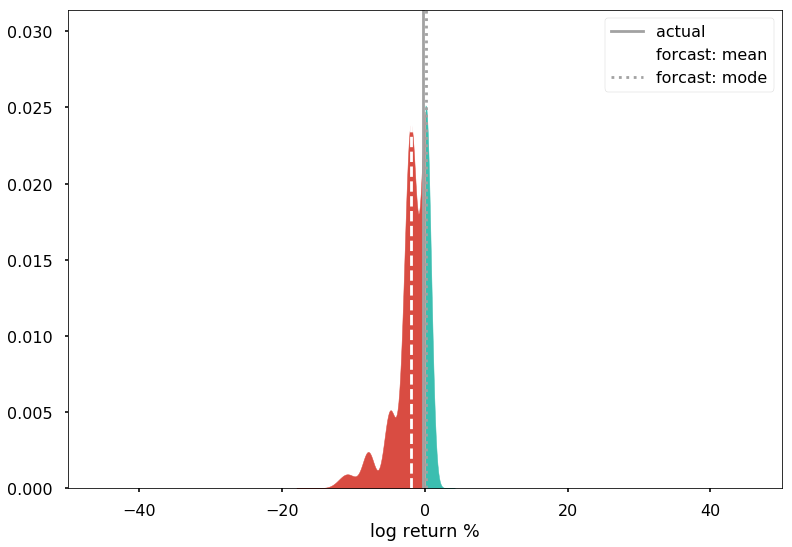

In [17]:
predict_plot(10, hmm, r_test)

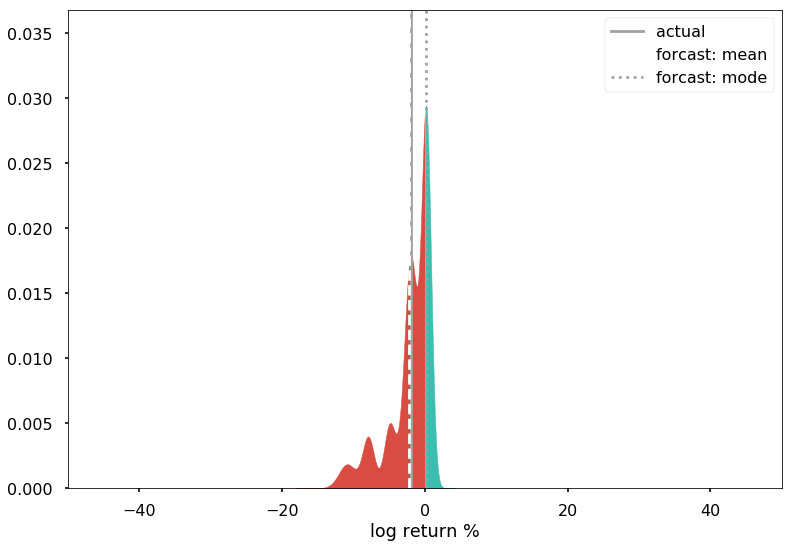

In [18]:
predict_plot(20, hmm, r_test)

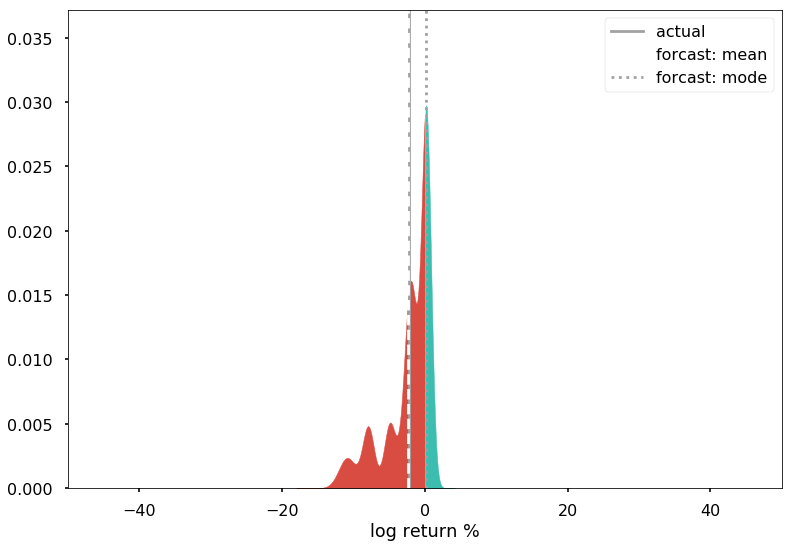

In [19]:
predict_plot(30, hmm, r_test)

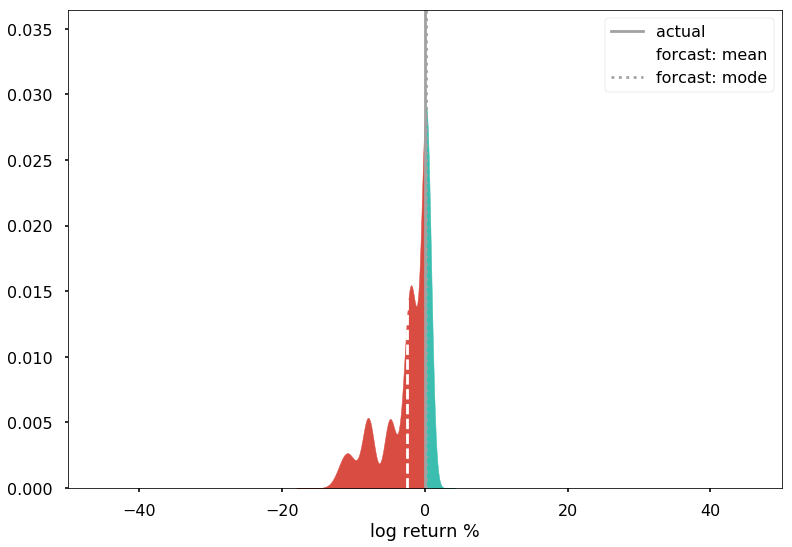

In [20]:
predict_plot(40, hmm, r_test)

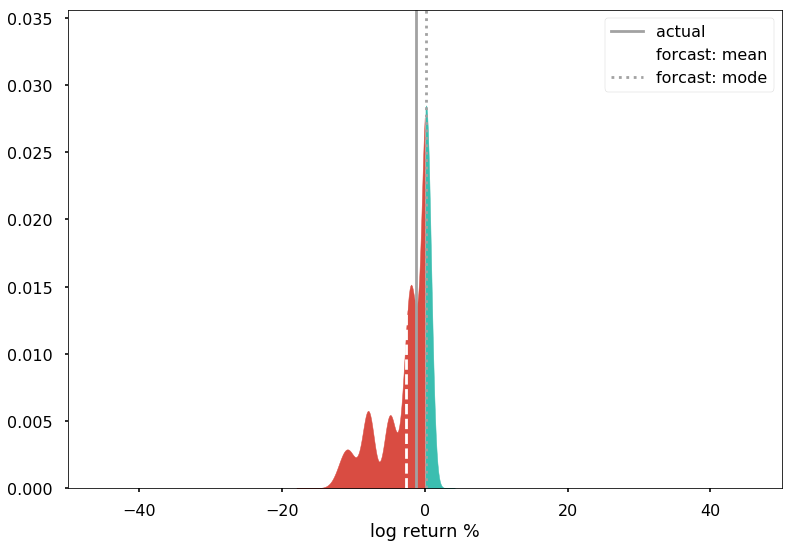

In [21]:
predict_plot(50, hmm, r_test)

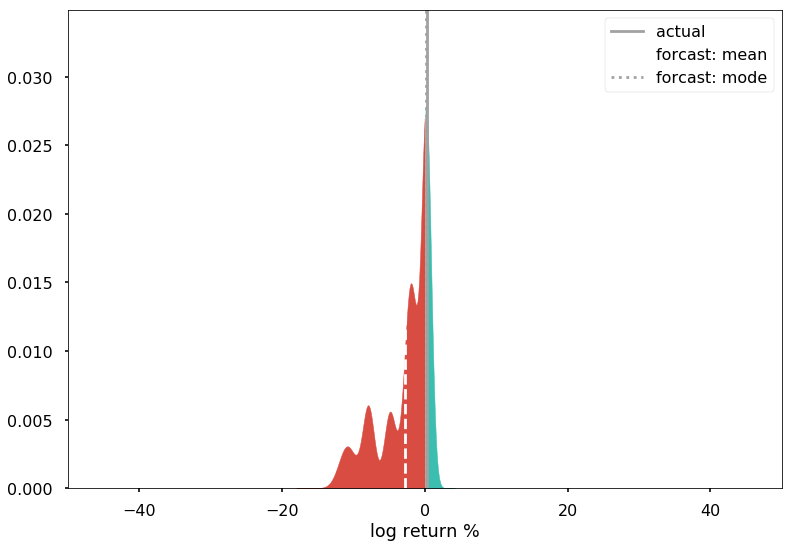

In [22]:
predict_plot(60, hmm, r_test)

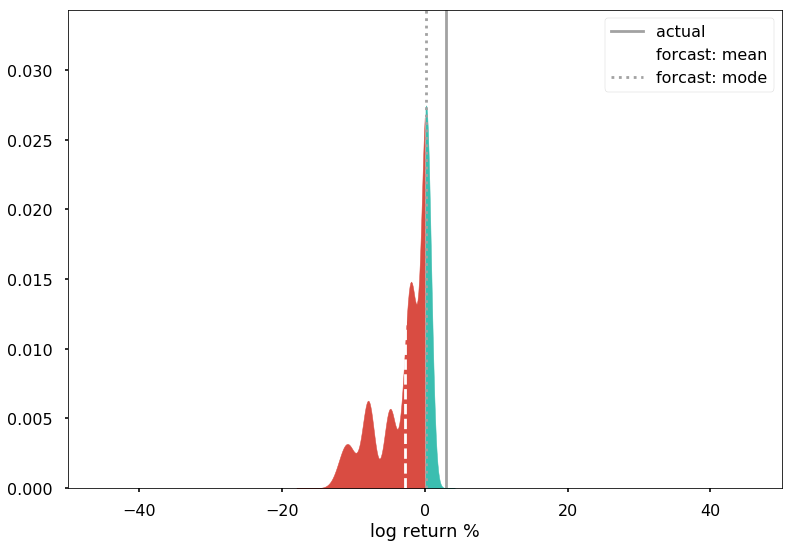

In [23]:
predict_plot(70, hmm, r_test)

[1. 1. 1. 1. 1.] 1.0
EM converged within 46 steps


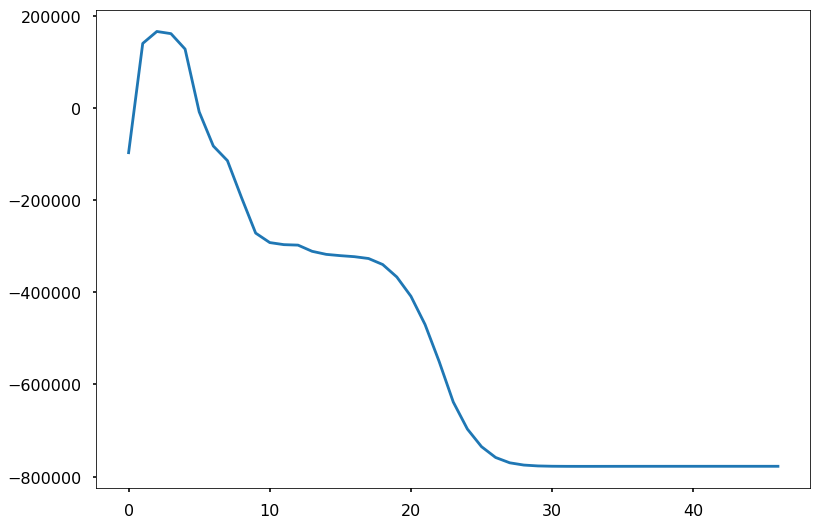

In [30]:
n_hidden = 5
p_i = np.random.uniform(size=n_hidden).round(5); p_i /=p_i.sum()
a_i = np.random.uniform(size=(n_hidden,n_hidden)).round(5); a_i /= a_i.sum(axis=1)[:,None]
print(a_i.sum(axis=1), p_i.sum())
param = {"initial": p_i, "transition": a_i, "emission": {'type': 'normal', 'mean': np.linspace(-1,1,n_hidden), 'variance': [1]*n_hidden}}
hmm = HiddenMarkovModel(param)
hmm.fit(r_train)
plot(hmm._Q_)

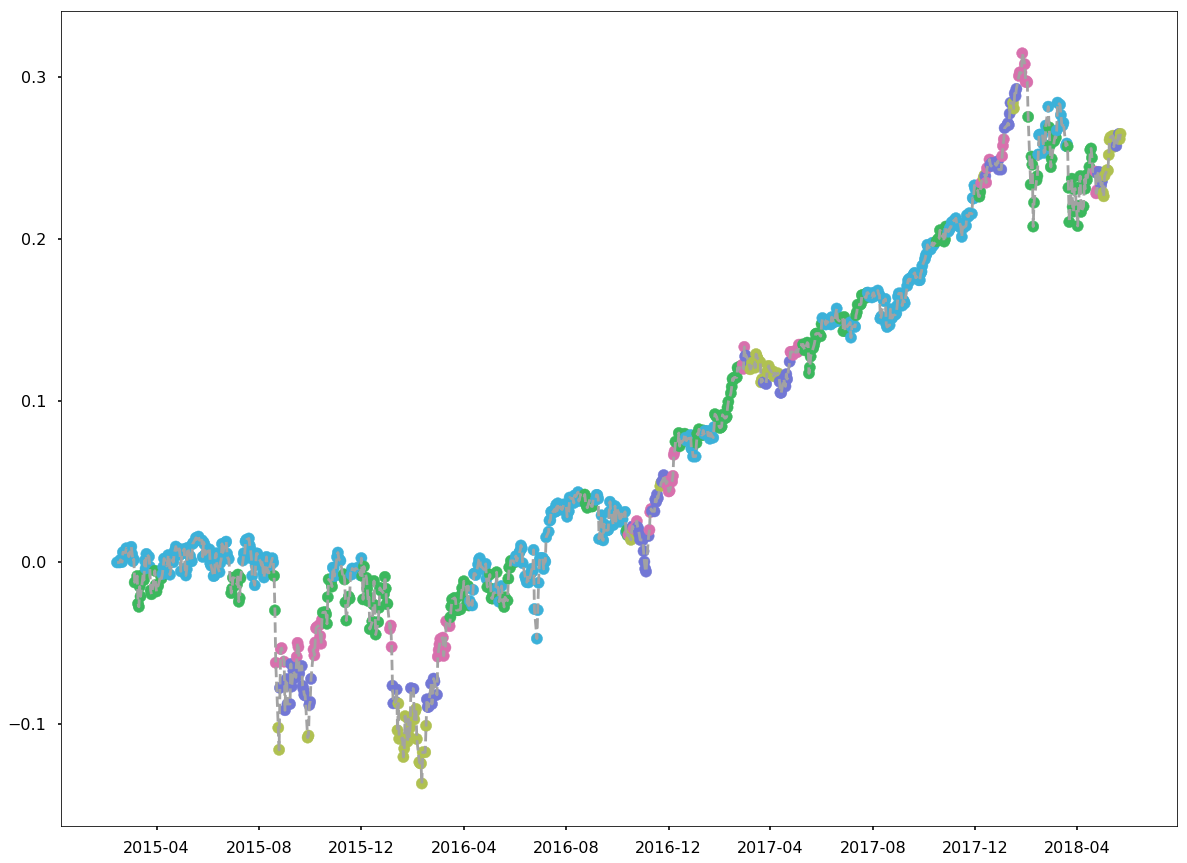

In [31]:
z_ = []
for p1 in hmm.posterior1:
    z_.append(np.argmax(p1))
z_ = np.array(z_)
figure(figsize=(20,15))
plot(r_, '--', c=cc_[-1])
scatter(r_.index, r_, c=cc_[z_*2])

In [32]:
print(hmm.export_params())

{'initial': array([0.00000000e+000, 0.00000000e+000, 1.00000000e+000, 2.07268687e-101,
       0.00000000e+000]), 'transition': array([[7.88152723e-001, 9.96399671e-002, 4.86603332e-139,
        7.86027763e-002, 3.36045338e-002],
       [1.14400217e-001, 7.95057770e-001, 1.61559466e-321,
        1.20897632e-099, 9.05420131e-002],
       [3.13444218e-027, 2.39799333e-113, 9.49848613e-001,
        5.01513866e-002, 1.03061447e-160],
       [2.92796027e-002, 3.23036548e-010, 6.44942104e-002,
        9.06226187e-001, 6.95774718e-053],
       [1.57292344e-032, 1.58413723e-001, 0.00000000e+000,
        3.97445241e-149, 8.41586277e-001]]), 'emission': {'type': 'normal', 'mean': array([-0.04875339, -0.07898056,  0.00216537, -0.01958741, -0.10849014]), 'variance': array([6.55639596e-05, 6.75158738e-05, 4.46850370e-05, 8.36756417e-05,
       1.41065194e-04])}}


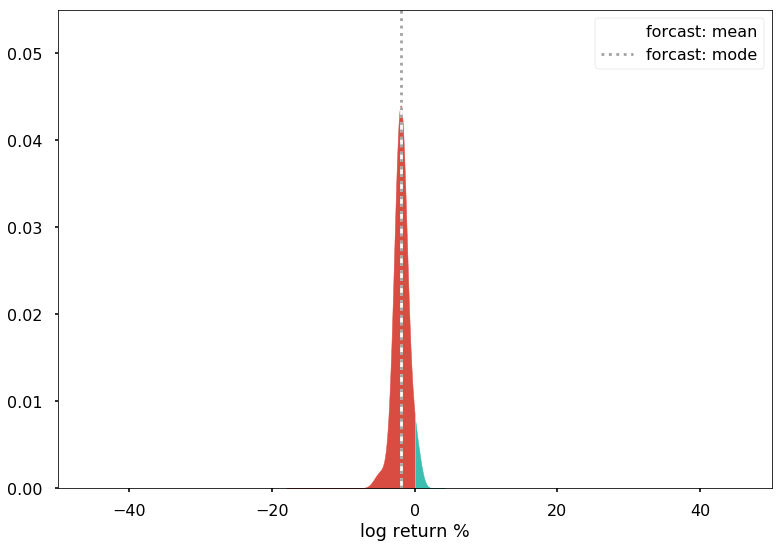

In [33]:
predict_plot(1, hmm)

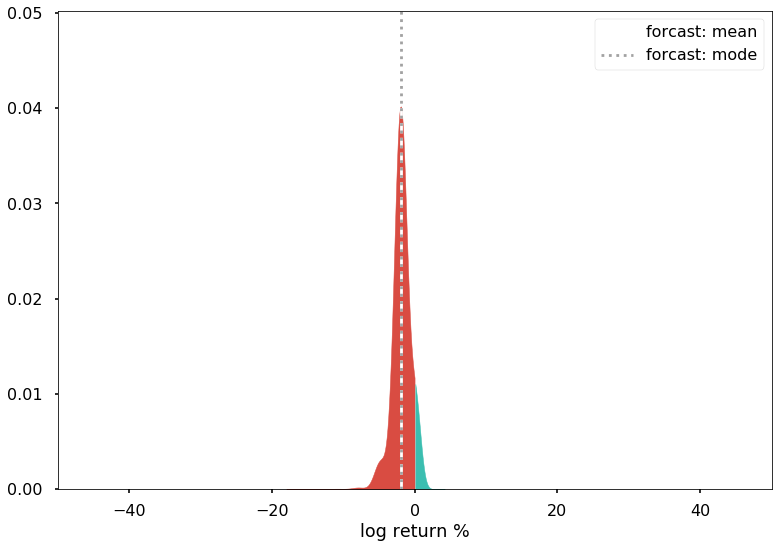

In [34]:
predict_plot(2, hmm)

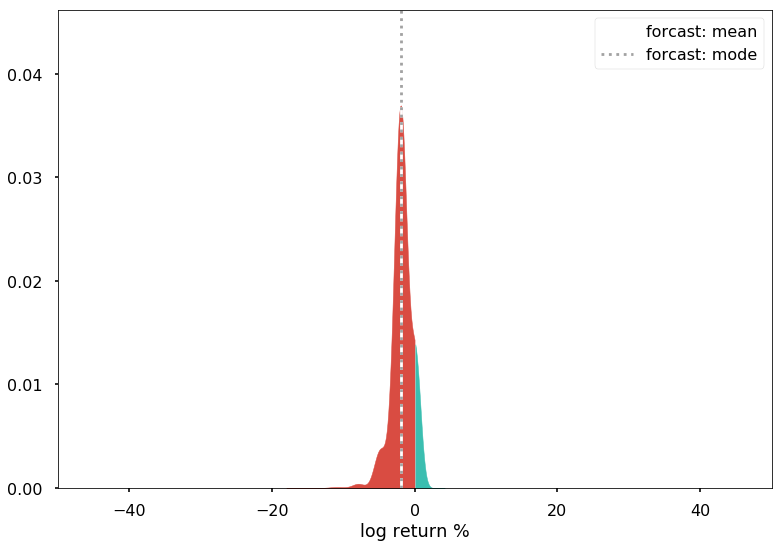

In [35]:
predict_plot(3, hmm)

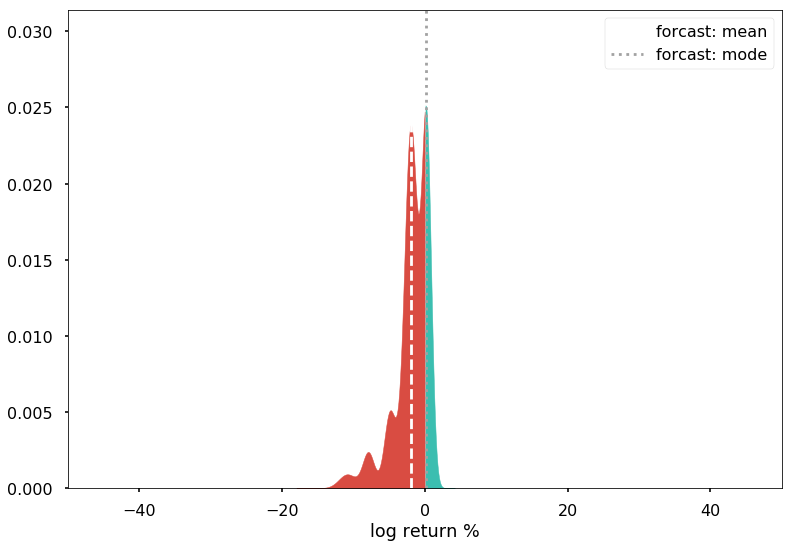

In [36]:
predict_plot(10, hmm)

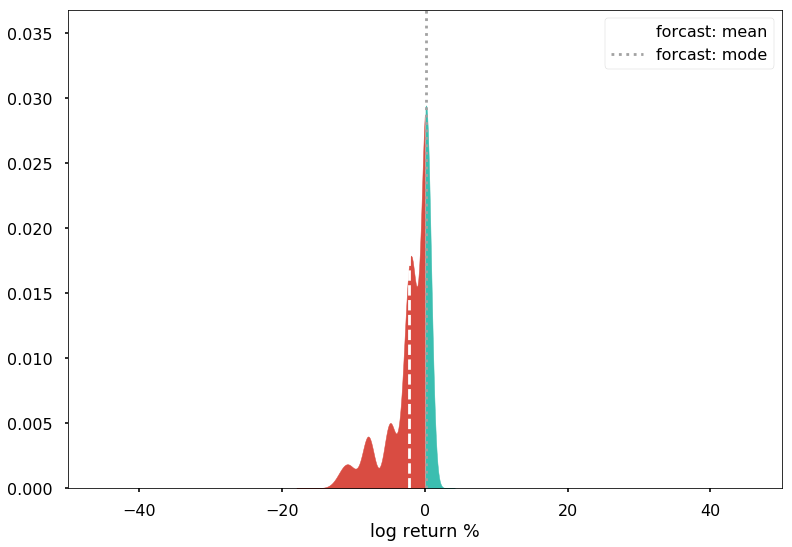

In [37]:
predict_plot(20, hmm)

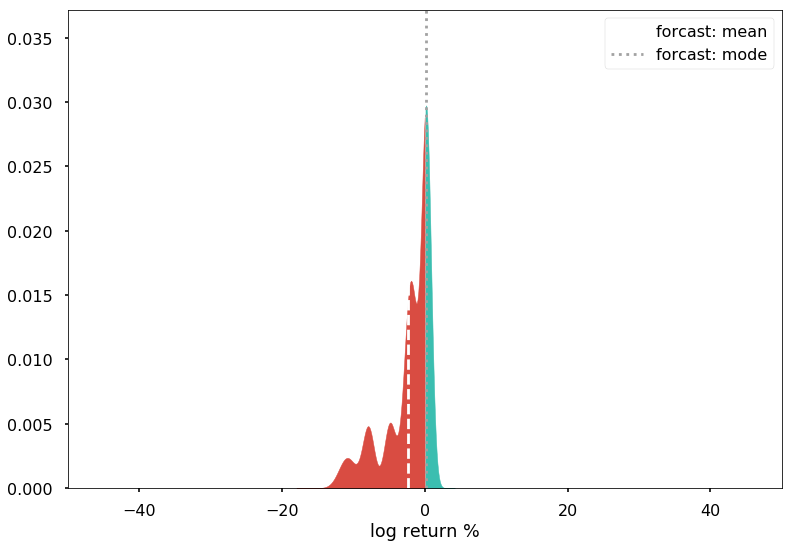

In [38]:
predict_plot(30, hmm)

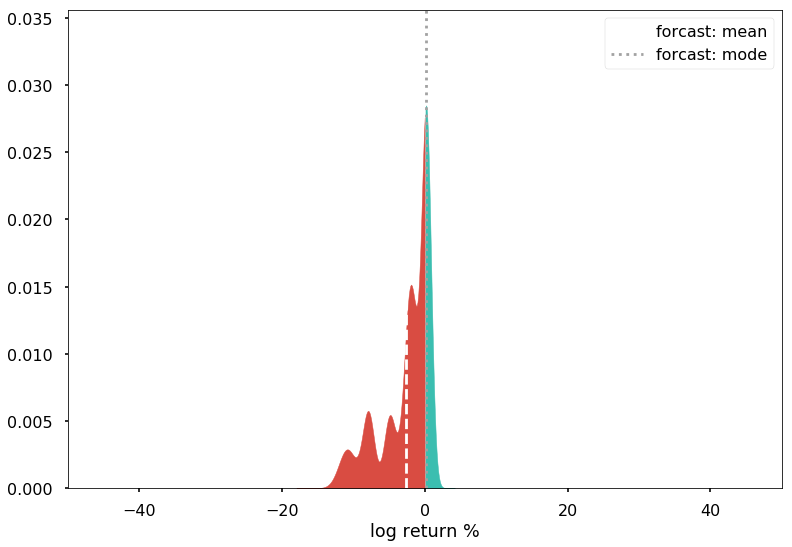

In [39]:
predict_plot(50, hmm)